# Scopus Intelligent Tutoring System 논문 텍스트마이닝

<검색 기준>

- 2013~2022 년 scopus 등재 논문
- 검색 키워드 Intelligent Tutoring System (제목, 목차, keyword 중 하나라도 포함)
- 언어 : 영어
- 최종 Published된 논문 
- Article로 한정
- 총 825편

<1차 스크리닝>

- 중복 논문 제거(동일 논문 다른 학술지 게재)
- 논문 초록을 읽고 ITS와 연관된 논문인지 1차 스크리닝. 
- 논문 주제가 ITS와 동떨어져있는데 언급만 한 정도에 그칠 경우 제외.
- 31편+1편(중복논문) 32편 제거
- 총 793편 

In [1]:
import pandas as pd
import numpy as np

C:\Users\장지수\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', size=10)        # 기본 폰트 크기
plt.rc('axes', labelsize=12)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=12)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=12)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=100) # figure title 폰트 크기

In [3]:
import re

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

True

In [5]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [7]:
from nltk.stem import WordNetLemmatizer

In [8]:
scopus_data = pd.read_excel("C:/Users/장지수/Desktop/ITS 토픽모델링/1차 분석/Scopus Raw Data(793편).xlsx")
scopus_data

,Title,Year,Source title,DOI,Link,Abstract
0,A survey on deep learning based knowledge tracing,2022,Knowledge-Based Systems,10.1016/j.knosys.2022.110036,https://www.scopus.com/inward/record.uri?eid=2...,“Knowledge tracing (KT)” is an emerging and po...
1,Eye Movement Analysis and Usability Assessment...,2022,Sustainability (Switzerland),10.3390/su142416680,https://www.scopus.com/inward/record.uri?eid=2...,Education is the key to achieving sustainable ...
2,DCKT: A Novel Dual-Centric Learning Model for ...,2022,Sustainability (Switzerland),10.3390/su142316307,https://www.scopus.com/inward/record.uri?eid=2...,"Knowledge tracing (KT), aiming to model learne..."
3,Adaptive learning: toward an intentional model...,2022,Smart Learning Environments,10.1186/s40561-022-00215-9,https://www.scopus.com/inward/record.uri?eid=2...,The goal of ITS is to support learning content...
4,Embedding cognitive framework with self-attent...,2022,Scientific Reports,10.1038/s41598-022-22539-9,https://www.scopus.com/inward/record.uri?eid=2...,"Recently, deep neural network-based cognitive ..."
...,...,...,...,...,...,...
788,Problem solving learning environments and asse...,2013,Computers and Education,10.1016/j.compedu.2012.11.024,https://www.scopus.com/inward/record.uri?eid=2...,This paper explores the relation between probl...
789,Student progress assessment with the help of a...,2013,Engineering Applications of Artificial Intelli...,10.1016/j.engappai.2012.01.006,https://www.scopus.com/inward/record.uri?eid=2...,Students and lecturers would like to know how ...
790,Generating a two-phase lesson for guiding begi...,2013,Computers and Education,10.1016/j.compedu.2012.09.006,https://www.scopus.com/inward/record.uri?eid=2...,"In this paper, an automated lesson generation ..."
791,Does supporting multiple student strategies le...,2013,Computers and Education,10.1016/j.compedu.2012.07.016,https://www.scopus.com/inward/record.uri?eid=2...,Intelligent tutoring systems (ITS) support stu...


# 연도별 ITS 주제 해외 논문 개수 추이

In [63]:
article_list = []
for i in range(2013, 2023):
    article_list.append(len(scopus_data[scopus_data['Year']==i]))
article_list

[79, 72, 68, 80, 77, 78, 79, 84, 94, 82]

분석 시 최종 출판 완료된 논문만을 대상으로 하였기 때문에, 

2022년도에 In press 중인 논문 24편을 제외하고 분석을 진행함. 

이를 고려하였을 때 2022년의 ITS관련 해외 논문 개수는 더 증가할 것으로 예상됨. 

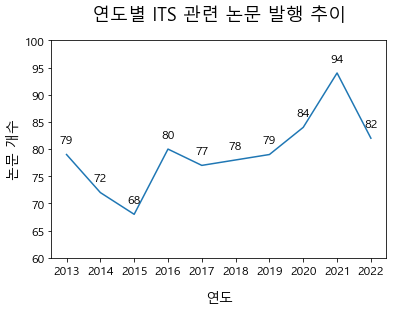

In [66]:
x=range(2013,2023)
plt.rc('font', family='Malgun Gothic')
plt.plot(x, article_list)
plt.xlabel("연도", size=14, labelpad=15)
plt.ylabel("논문 개수", size=14)
plt.title("연도별 ITS 관련 논문 발행 추이", size=18, pad=20)
plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.ylim(60,100)
for i in range(len(x)):
    height = article_list[i]
    plt.text(x[i], height + 1.5, '%d' %height, ha='center', va='bottom', size = 12)
plt.show()

# ITS 주제 논문 빈도 수 상위 10개 학술지

In [11]:
article_name = scopus_data.groupby('Source title').count().sort_values('Abstract', ascending=False).iloc[:10, 4]
article_name

Source title
International Journal of Artificial Intelligence in Education    84
Computers and Education                                          56
IEEE Transactions on Learning Technologies                       24
International Journal of Emerging Technologies in Learning       21
Computers in Human Behavior                                      19
Journal of Educational Psychology                                17
Educational Technology and Society                               14
Education and Information Technologies                           14
Educational Technology Research and Development                  12
Expert Systems with Applications                                 11
Name: Abstract, dtype: int64

In [12]:
article = list(article_name.index)
article

['International Journal of Artificial Intelligence in Education',
 'Computers and Education',
 'IEEE Transactions on Learning Technologies',
 'International Journal of Emerging Technologies in Learning',
 'Computers in Human Behavior',
 'Journal of Educational Psychology',
 'Educational Technology and Society',
 'Education and Information Technologies',
 'Educational Technology Research and Development',
 'Expert Systems with Applications']

## 텍스트 전처리

In [13]:
scopus_data['Abstract'][0]

'“Knowledge tracing (KT)” is an emerging and popular research topic in the field of online education that seeks to assess students’ mastery of a concept based on their historical learning of relevant exercises on an online education system in order to make the most accurate prediction of student performance. Since there have been a large number of KT models, we attempt to systematically investigate, compare and discuss different aspects of KT models to find out the differences between these models in order to better assist researchers in this field. The findings of this study have made substantial contributions to the progress of online education, which is especially relevant in light of the current global pandemic. As a result of the current expansion of deep learning methods over the last decade, researchers have been tempted to include deep learning strategies into KT research with astounding results. In this paper, we evaluate current research on deep learning-based KT in the main 

In [14]:
scopus_data['Abstract'][5]

'Intelligent tutoring systems are computer-assisted learning systems with adaption to students using artificial intelligence tools. An intelligent tutoring system can drastically improve education efficiency as it provides solutions to many issues that now plague the educational industry. One important component in education is questioning learners to assess and reinforce learning. This research compares two approaches for automatic question generation, a template-based question generation strategy and the phrase-Level automatic question generation system utilizing the Multilayer perceptron model. A template-based technique is a baseline for automatic question generation that uses templates taken from the training set to generate questions by filling certain templates with specific topic items. We utilize question-answer sentence composition datasets and manually constructed datasets for our experiments and comparison of the Multilayer perceptron training model. We used both human and 

In [15]:
# 최종 함수
# 특정 abstract 정제 ~ 불용어 처리 함수
def preprocessing(num):
    
    num = int(num)
    
    # 정제
    scopus_data_abstract = scopus_data['Abstract'][num].split("©")[0]
    scopus_data_abstract = re.sub('[^-A-Za-z]', ' ', scopus_data_abstract)
    shortword = re.compile(r'\W*\b\w{1}\b')
    scopus_data_abstract = shortword.sub('', scopus_data_abstract)

    # 정규화
    scopus_data_abstract = scopus_data_abstract.replace(" KT", " Knowledge-tracing").replace("Knowledge tracing", "Knowledge-tracing").replace("knowledge tracing", "Knowledge-tracing").replace("Knowledge Tracing", "Knowledge-tracing")
    scopus_data_abstract = scopus_data_abstract.replace("Deep Learning", "Deep-learning").replace("Deep learning", "Deep-learning").replace("deep learning", "Deep-learning").replace(" DL", "Deep-learning").replace("Deep-learning-based", "Deep-learning")
    scopus_data_abstract = scopus_data_abstract.replace("Machine Learning", "Machine-learning").replace(" ML", " Machine-learning").replace("machine learning", " Machine-learning").replace("Machine learning", " Machine-learning")
    scopus_data_abstract = scopus_data_abstract.replace("Intelligent tutoring system", "Intelligent-tutoring-system").replace("Intelligent tutoring systems", "Intelligent-tutoring-system").replace("Intelligent Tutoring System", "Intelligent-tutoring-system").replace("ITS", "Intelligent-tutoring-system").replace("Intelligent-tutoring-systems", "Intelligent-tutoring-system").replace("ITSs", "Intelligent-tutoring-system")
    scopus_data_abstract = scopus_data_abstract.replace("System Usability Scale", "System-Usability-Scale").replace(" SUS", " System-Usability-Scale")
    scopus_data_abstract = scopus_data_abstract.replace("Dual-Centric Knowledge Tracing", "Dual-Centric-Knowledge-Tracing").replace(" DCKT", " Dual-Centric-Knowledge-Tracing")
    
    scopus_data_abstract = scopus_data_abstract.replace('student model', 'student-model').replace('student module', 'student-model').replace('student modeling', 'student-model').replace('learner model', 'student-model').replace('learner module', 'student-model').replace('student-modeling', 'student-model').replace('student-modelings', 'student-model').replace('student-models', 'student-model')
    scopus_data_abstract = scopus_data_abstract.replace('knowledge model', 'domain-model').replace('domain-modeling', 'domain-model').replace('domain-models', 'domain-model').replace('domain model', 'domain-model').replace('domain modeling', 'domain-model').replace('domain module', 'domain-model')
    scopus_data_abstract = scopus_data_abstract.replace('pedagogical model', 'instruction-model').replace('pedagogical module', 'instruction-model').replace('teacher model', 'instruction-model').replace('instructor model', 'instruction-model').replace('instruction model', 'instruction-model').replace('instructional model', 'instruction-model').replace('tutoring model', 'instruction-model').replace('tutoring module', 'instruction-model').replace('tutor model', 'instruction-model')
    
    scopus_data_abstract = scopus_data_abstract.replace('self-regulated learning', 'self-regulated-learning').replace('self regulated learning', 'self-regulated-learning').replace('Self-regulated learning', 'self-regulated-learning').replace('Self-Regulated Learning', 'self-regulated-learning').replace('SRL', 'self-regulated-learning').replace('srl', 'self-regulated-learning').replace('Srl', 'self-regulated-learning').replace('self regulation', 'self-regulation').replace('self-regulatory', 'self-regulation')
    scopus_data_abstract = scopus_data_abstract.replace('cognitive tutor', 'Cognitive-tutor').replace('Item Response Theory', 'Item-response-theory').replace('Item response theory', 'Item-response-theory')
    scopus_data_abstract = scopus_data_abstract.replace('item response theory', 'Item-response-theory').replace('IRT', 'Item-response-theory').replace('help seek', 'help-seeking').replace('help seeking', 'help-seeking')
    scopus_data_abstract = scopus_data_abstract.replace('Help seeking', 'help-seeking').replace('Help Seeking', 'help-seeking').replace('Auto tutor', 'Auto-tutor').replace('Auto Tutor', 'Auto-tutor')    
    
    scopus_data_abstract = scopus_data_abstract.replace('educational data mining', 'educational-data-mining').replace('Educational data mining', 'educational-data-mining').replace('Educational Data Mining', 'educational-data-mining').replace('EDM', 'educational-data-mining')
    scopus_data_abstract = scopus_data_abstract.replace('learning analytics', 'learning-analytics').replace('Learning Analytics', 'learning-analytics').replace('Learning analytics', 'learning-analytics')

    scopus_data_abstract = scopus_data_abstract.replace('scaffolding', 'scaffold').replace('mastery learning', 'mastery-learning')
     
    scopus_data_abstract = scopus_data_abstract.replace("learner", "learning").replace("learners", "learning").replace("learnings", "learning").replace("tutors", "tutor").replace("strategies", "strategy").replace("problems", "problem").replace("skills", "skill")
    scopus_data_abstract = scopus_data_abstract.replace("students", "student").replace("teach", "teaching").replace("teaches", "teaching").replace('module', 'model')
    
    
    # 토큰화
    tokenizer = TreebankWordTokenizer()
    text = scopus_data_abstract
    tokenized_sentence=tokenizer.tokenize(text)
    
    # 표제어 추출 
    lemmatizer = WordNetLemmatizer()
    tokenized_sentence = [lemmatizer.lemmatize(word, pos='v') for word in tokenized_sentence]
    tokenized_sentence = [lemmatizer.lemmatize(word, pos='n') for word in tokenized_sentence]
    
    # 불용어 처리
    stop_words = list(stopwords.words('english'))
    normal_word_list = ['use', 'find', 'provide', 'person', 'study', 'also', 'make', 'show', 'work', 'present', 'propose', 'paper', 'state', 'read', 'write', 'two']
    normal_word_list2 = ['versus','base','result','however', 'word', 'prior']
    normal_word_list3 = ['intelligent', 'tutor', 'system', 'systems', 'intelligent-tutoring-system',"intelligent-tutoring-systems"]
    stop_words.extend(normal_word_list)
    stop_words.extend(normal_word_list2)
    stop_words.extend(normal_word_list3)
    
    result = []
    for word in tokenized_sentence: 
        if word.lower() not in stop_words: 
            result.append(word.lower())
    return result

In [16]:
# 각 논문 초록 별 word token 저장
word_token_list = []
for i in range(len(scopus_data)):
    word_token_list.append(preprocessing(i))
word_token_list

[['knowledge-tracing',
  'knowledge-tracing',
  'emerge',
  'popular',
  'research',
  'topic',
  'field',
  'online',
  'education',
  'seek',
  'ass',
  'student',
  'mastery',
  'concept',
  'historical',
  'learn',
  'relevant',
  'exercise',
  'online',
  'education',
  'order',
  'accurate',
  'prediction',
  'student',
  'performance',
  'since',
  'large',
  'number',
  'knowledge-tracing',
  'model',
  'attempt',
  'systematically',
  'investigate',
  'compare',
  'discus',
  'different',
  'aspect',
  'knowledge-tracing',
  'model',
  'difference',
  'model',
  'order',
  'better',
  'assist',
  'researcher',
  'field',
  'substantial',
  'contribution',
  'progress',
  'online',
  'education',
  'especially',
  'relevant',
  'light',
  'current',
  'global',
  'pandemic',
  'current',
  'expansion',
  'deep-learning',
  'method',
  'last',
  'decade',
  'researcher',
  'tempt',
  'include',
  'deep-learning',
  'strategy',
  'knowledge-tracing',
  'research',
  'astound',
  

In [17]:
len(word_token_list)

793

In [18]:
word_token_list[5]

['computer-assisted',
 'learn',
 'adaption',
 'student',
 'artificial',
 'intelligence',
 'tool',
 'drastically',
 'improve',
 'education',
 'efficiency',
 'solution',
 'many',
 'issue',
 'plague',
 'educational',
 'industry',
 'one',
 'important',
 'component',
 'education',
 'question',
 'learn',
 'ass',
 'reinforce',
 'learn',
 'research',
 'compare',
 'approach',
 'automatic',
 'question',
 'generation',
 'template-based',
 'question',
 'generation',
 'strategy',
 'phrase-level',
 'automatic',
 'question',
 'generation',
 'utilize',
 'multilayer',
 'perceptron',
 'model',
 'template-based',
 'technique',
 'baseline',
 'automatic',
 'question',
 'generation',
 'template',
 'take',
 'train',
 'set',
 'generate',
 'question',
 'fill',
 'certain',
 'template',
 'specific',
 'topic',
 'item',
 'utilize',
 'question-answer',
 'sentence',
 'composition',
 'datasets',
 'manually',
 'construct',
 'datasets',
 'experiment',
 'comparison',
 'multilayer',
 'perceptron',
 'train',
 'model',
 'h

In [19]:
word_token_list[2]

['knowledge-tracing',
 'knowledge-tracing',
 'aim',
 'model',
 'learn',
 'mastery',
 'concept',
 'historical',
 'learn',
 'record',
 'receive',
 'extensive',
 'attention',
 'due',
 'great',
 'potential',
 'realize',
 'personalize',
 'learn',
 'exist',
 'knowledge-tracing',
 'method',
 'focus',
 'single',
 'aspect',
 'knowledge',
 'learn',
 'pay',
 'careful',
 'attention',
 'couple',
 'influence',
 'knowledge',
 'learn',
 'characteristic',
 'fill',
 'gap',
 'explore',
 'new',
 'paradigm',
 'knowledge-tracing',
 'task',
 'exploit',
 'couple',
 'influence',
 'knowledge',
 'learn',
 'novel',
 'model',
 'call',
 'dual-centric',
 'knowledge-tracing',
 'dual-centric-knowledge-tracing',
 'model',
 'knowledge',
 'joint',
 'task',
 'domain-model',
 'student-model',
 'particular',
 'first',
 'generate',
 'concept',
 'embeddings',
 'abundant',
 'knowledge',
 'structure',
 'information',
 'via',
 'pretext',
 'task',
 'knowledge-centric',
 'unsupervised',
 'graph',
 'representation',
 'learn',
 'dee

## Gensim으로 LDA 기반 토픽모델링

In [20]:
len(word_token_list[0])

115

In [21]:
from gensim import corpora
dictionary = corpora.Dictionary(word_token_list)
corpus = [dictionary.doc2bow(text) for text in word_token_list]
print(corpus[0]) 

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 7), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 11), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 4), (50, 2), (51, 1), (52, 3), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 4), (63, 2), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1)]


In [22]:
import random

# 파라미터 튜닝

In [23]:
from gensim.models import CoherenceModel

In [24]:
from tqdm import tqdm
import time

#### Pass 파라미터 튜닝

In [25]:
'''
NUM_TOPICS = 10
ITERATION = 50  
RANDOM_SEED = 100
Coherence_list = []

for i in tqdm(range(1,101)):
    p_ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, chunksize = 2000, iterations = ITERATION, passes= i, random_state=RANDOM_SEED)
    cm = CoherenceModel(model=p_ldamodel, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    Coherence_list.append(coherence)

Coherence_list
'''
Coherence_list = [-1.5807220877625612,-1.6044112830361588,-1.6559870031275232,-1.6829371962727528,-1.8239398289180406,-1.9159158799514295,-2.0124649024366366,-2.002303420922226,
 -1.9833831205607446,-1.9810368308080175,-2.028571541985974,-2.0717505340497837,-2.214032223431848,-2.2758894801753695,-2.2746994602074646,-2.2385556669671938,-2.230212800490389,
 -2.223862591449669,-2.217557902124933,-2.2292477599874996,-2.2287187215748774,-2.321192022478951,-2.3176401356672796,-2.358279841769204,-2.5353079561847847,-2.529326477327716,-2.5242384722437725,
 -2.526089303981898,-2.507144566309106,-2.5070470726807814,-2.503074913722702,-2.5092554119043315,-2.5062151645411888,-2.5024495821035293,-2.5219764556213478,-2.5348930495599915,
 -2.530639423819256,-2.5311983439050403,-2.543682520415931,-2.5406371198241,-2.5386021853394487,-2.5368162541046813,-2.541152865715133,-2.540346825519889,-2.538787308845374,-2.5393068670709136,-2.5389260993751104,
 -2.5443153207045155,-2.542546854314036,-2.542110617236957,-2.5388282645404763,-2.544697024836853,-2.553446430132181,-2.552368653545064,-2.570025140781945,
 -2.56291355754293,-2.5623248092584054,-2.558287802989503,-2.513398070879628,-2.512339650393841,-2.5118406196197767,-2.5118799306158826,-2.5121751545873656,-2.501541016309118,
 -2.500291641393299,-2.4993769752624333,-2.502225210026568,-2.501315784764862,-2.5015251716163633,-2.5014512515086826,-2.49972797455863,-2.5000130240375364,-2.5000130240375364,
 -2.50024071672026,-2.4979523991883377,-2.498294433815084,-2.495686431196202,-2.496239244642359,-2.4929610521331638,-2.482757051656488,-2.4819105164021193,-2.481673992219606,
 -2.4814199217517645,-2.4807315886260985,-2.480547549811109,-2.4788757437184334,-2.4788740385901944,-2.477412016965783,-2.475594629913438,-2.4741362746893527,-2.4734026738647445,
 -2.4687415958729546,-2.4667838454941484,-2.466495113747873,-2.4661951354708536,-2.4641672805598973,-2.4627582390496827,-2.4618915099746266,-2.4618915099746266,-2.4621013684356403]

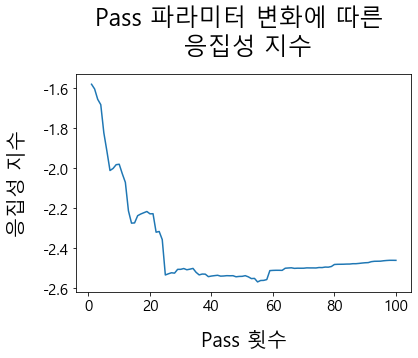

In [26]:
x=range(1,101)
plt.rc('font', family='Malgun Gothic')
plt.plot(x, Coherence_list)
plt.xlabel("Pass 횟수", size=20, labelpad=15)
plt.ylabel("응집성 지수", size=20, labelpad=15)
plt.title("Pass 파라미터 변화에 따른 \n 응집성 지수", size=24, pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### 토픽 개수 파라미터 튜닝

In [27]:
'''
NUM_TOPICS_LIST = []
ITERATION = 50
RANDOM_SEED = 100
PASS = 10

for i in tqdm(range(2,16)):
    p_ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word=dictionary, chunksize = 2000, iterations = ITERATION, passes= PASS, random_state=RANDOM_SEED)
    cm = CoherenceModel(model=p_ldamodel, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    NUM_TOPICS_LIST.append(coherence)

NUM_TOPICS_LIST
'''
NUM_TOPICS_LIST = [-1.511286256864651,-1.553322243110166,-1.6637663061118766,-1.672010584764097,-1.8471209811842328,-1.8897339938928643,-2.0198936102797527,
 -1.9532701708733176,-1.9810368308080175,-1.9225525940893733,-2.189547591367951,-2.2658450777979686,-2.233988134178893,-2.3517129911223886]

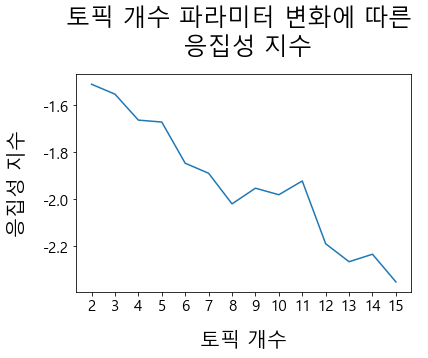

In [28]:
x=range(2,16)
plt.rc('font', family='Malgun Gothic')
plt.plot(x, NUM_TOPICS_LIST)
plt.xlabel("토픽 개수", size=20, labelpad=15)
plt.ylabel("응집성 지수", size=20, labelpad=15) # 하나의 토픽에서 일관적인 내용이 나올수록 값이 올라감. elbow point 11이 이상적
plt.title("토픽 개수 파라미터 변화에 따른 \n 응집성 지수", size=24, pad=20)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Iteration 파라미터 튜닝

In [29]:
'''
NUM_TOPIC = 4
ITERATION_LIST = []
RANDOM_SEED = 100
PASS = 10

for i in tqdm(range(1,101)):
    p_ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPIC, id2word=dictionary, chunksize = 2000, iterations = i, passes= PASS, random_state=RANDOM_SEED)
    cm = CoherenceModel(model=p_ldamodel, corpus=corpus, coherence='u_mass')
    coherence = cm.get_coherence()
    ITERATION_LIST.append(coherence)

ITERATION_LIST
'''
ITERATION_LIST = [-1.3824823102095425,-1.3961528510487216,-1.4042318252812498,-1.4897847641873947,-1.5607445421907244,-1.59854176885157,-1.6141923813112462,-1.6048932630503696,
 -1.5746625200858593,-1.5853281074083576,-1.5725977377783984,-1.5796080181336754,-1.5652823337255035,-1.5512290159130515,-1.5574363170658687,-1.5541412926838436,
 -1.5536334885739809,-1.5182283343943963,-1.5050022569689732,-1.4999975243528063,-1.6079115836115647,-1.59588941747946,-1.6103167446444377,-1.6431066095916005,
 -1.632026106095515,-1.6255369505964876,-1.6958289146443202,-1.7048818160133468,-1.6850981977298056,-1.6835535999183526,-1.6814533021521274,-1.6808562982487272,
 -1.6790160125801825,-1.6765368763352662,-1.6740878194727566,-1.6688283066099763,-1.6753419008117243,-1.6728352054106423,-1.7346011593478745,-1.7262781127032265,
 -1.7263105106084158,-1.7240509320636093,-1.7066342625755007,-1.703957599536907,-1.7011061581395248,-1.6995707219123597,-1.6729051495077532,-1.6661666857661062,-1.6642957645944176,
 -1.6637663061118766,-1.6594006954778062,-1.6572536544668846,-1.664659568496966,-1.674826370400852,-1.6721593492899285,-1.672449518414629,-1.6857101186437975,-1.6829723298665014,
 -1.6829723298665014,-1.682886986926762,-1.6836889717794579,-1.681387881511708,-1.7325940399467665,-1.7276363653446332,-1.7269000287815603,-1.7245329142822645,-1.7215750605601972,
 -1.720586810786128,-1.7169705888344633,-1.7169705888344633,-1.7163248917821434,-1.7168952765457788,-1.7255904445932846,-1.7264855021929215,-1.7268295544298395,-1.7251037603923156,
 -1.7237774058142747,-1.7229636475406456,-1.7229636475406456,-1.7207940289851227,-1.7171391763951176,-1.7171391763951176,-1.7130937339923584,-1.714040993757654,-1.7141184154682105,
 -1.7159067620103867,-1.7296659049774332,-1.7296659049774332,-1.7440985326557779,-1.744301362497656,-1.7310240894496451,-1.7518823990450687,-1.7493732570343812,-1.7493732570343812,
 -1.7489831350578888,-1.7489831350578888,-1.7638921580585234,-1.7638921580585234,-1.7649578295431492,-1.7649578295431492]

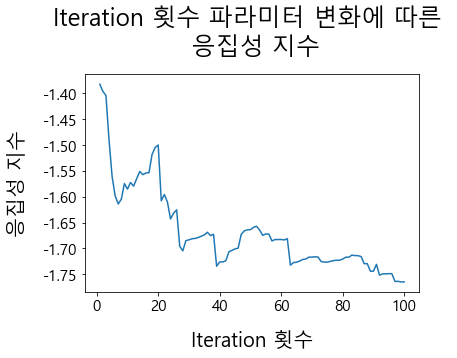

In [30]:
x=range(1,101)
plt.plot(x, ITERATION_LIST)
plt.xlabel("Iteration 횟수", size=20, labelpad=15)
plt.ylabel("응집성 지수", size=20, labelpad=15)
plt.title("Iteration 횟수 파라미터 변화에 따른 \n 응집성 지수", size=24, pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### 하이퍼 파라미터

In [31]:
import gensim
NUM_TOPICS = 4 #생성될 토픽의 개수
PASS = 10 # 전체 코퍼스 트레이닝 반복 횟수
ITERATION = 19 # 문서당 반복 횟수

RANDOM_SEED = 441 


ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, chunksize = 2000, iterations = ITERATION, passes= PASS, random_state=RANDOM_SEED)
cm = CoherenceModel(model=ldamodel, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-1.6462239482636385

In [60]:
ldamodel.print_topics(num_words=30)

[(0,
  '0.020*"learn" + 0.014*"student" + 0.008*"research" + 0.008*"design" + 0.007*"knowledge" + 0.007*"teach" + 0.006*"tool" + 0.006*"support" + 0.006*"agent" + 0.006*"process" + 0.006*"user" + 0.005*"author" + 0.005*"train" + 0.005*"technology" + 0.004*"model" + 0.004*"question" + 0.004*"domain" + 0.004*"approach" + 0.004*"educational" + 0.004*"different" + 0.004*"teachingers" + 0.004*"develop" + 0.004*"review" + 0.003*"help" + 0.003*"representation" + 0.003*"task" + 0.003*"language" + 0.003*"education" + 0.003*"data" + 0.003*"program"'),
 (1,
  '0.021*"model" + 0.017*"student" + 0.015*"learn" + 0.013*"knowledge" + 0.008*"approach" + 0.006*"performance" + 0.006*"level" + 0.005*"data" + 0.005*"exercise" + 0.005*"program" + 0.004*"skill" + 0.004*"affective" + 0.004*"task" + 0.004*"method" + 0.004*"knowledge-tracing" + 0.004*"predict" + 0.004*"process" + 0.004*"difficulty" + 0.004*"prediction" + 0.003*"information" + 0.003*"game" + 0.003*"time" + 0.003*"student-model" + 0.003*"question

In [32]:
topics = ldamodel.print_topics(num_words=20)
for topic in topics:
    print(topic)

(0, '0.020*"learn" + 0.014*"student" + 0.008*"research" + 0.008*"design" + 0.007*"knowledge" + 0.007*"teach" + 0.006*"tool" + 0.006*"support" + 0.006*"agent" + 0.006*"process" + 0.006*"user" + 0.005*"author" + 0.005*"train" + 0.005*"technology" + 0.004*"model" + 0.004*"question" + 0.004*"domain" + 0.004*"approach" + 0.004*"educational" + 0.004*"different"')
(1, '0.021*"model" + 0.017*"student" + 0.015*"learn" + 0.013*"knowledge" + 0.008*"approach" + 0.006*"performance" + 0.006*"level" + 0.005*"data" + 0.005*"exercise" + 0.005*"program" + 0.004*"skill" + 0.004*"affective" + 0.004*"task" + 0.004*"method" + 0.004*"knowledge-tracing" + 0.004*"predict" + 0.004*"process" + 0.004*"difficulty" + 0.004*"prediction" + 0.003*"information"')
(2, '0.041*"student" + 0.025*"learn" + 0.011*"problem" + 0.007*"feedback" + 0.007*"model" + 0.007*"group" + 0.006*"solve" + 0.006*"skill" + 0.005*"knowledge" + 0.005*"design" + 0.005*"assessment" + 0.005*"teach" + 0.005*"performance" + 0.004*"research" + 0.004

λ(람다) = (Salience & Discriminative Power 고려) (0에 가까울수록 토픽간에 차이가 많이 나는 단어 선택)

# ITS 관련 해외 논문 연구 주제 분석 결과 시각화

In [67]:
import pyLDAvis.gensim_models 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


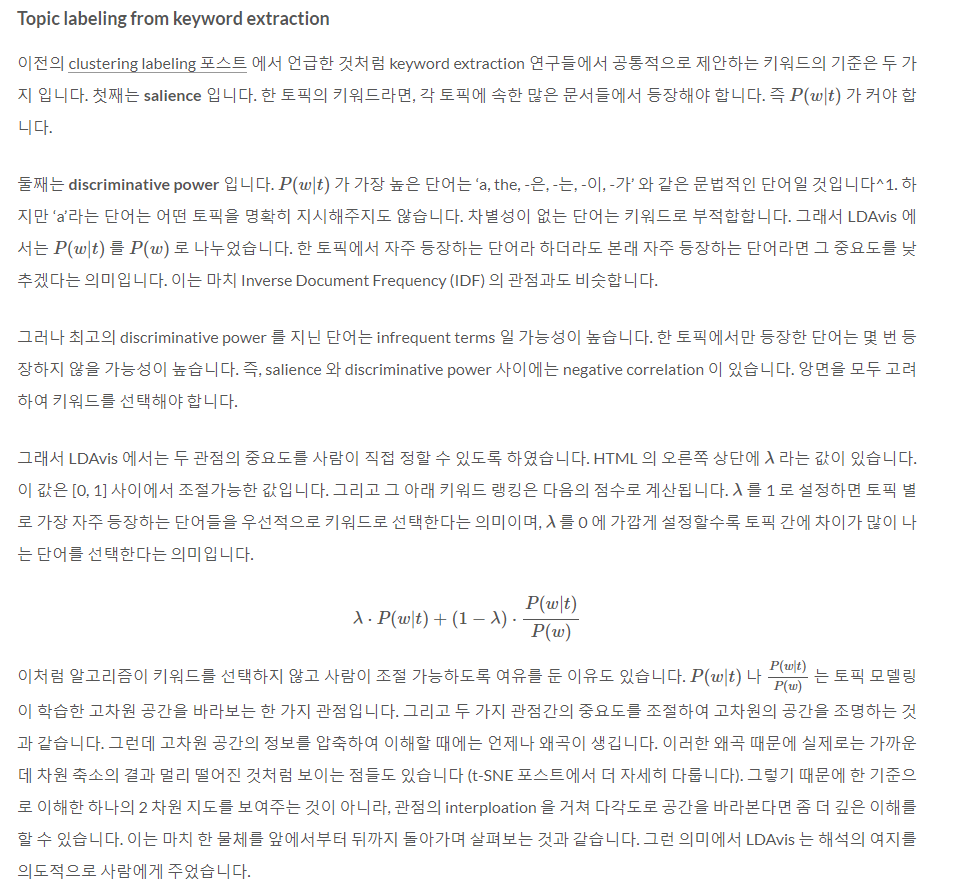

# 해당 토픽비중이 가장 높은 논문 비율

In [35]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [36]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['논문 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable

,논문 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,1.0,0.8967,"[(0, 0.06674563), (1, 0.89666677), (3, 0.03413..."
1,1,3.0,0.9910,"[(3, 0.99102396)]"
2,2,1.0,0.9684,"[(1, 0.9684011), (3, 0.027870305)]"
3,3,3.0,0.9916,"[(3, 0.99156904)]"
4,4,1.0,0.7216,"[(1, 0.72162676), (2, 0.27062234)]"
...,...,...,...,...
788,788,2.0,0.9909,"[(2, 0.9909186)]"
789,789,1.0,0.7251,"[(0, 0.103792265), (1, 0.7250556), (2, 0.14937..."
790,790,3.0,0.9901,"[(3, 0.9901391)]"
791,791,2.0,0.9937,"[(2, 0.993714)]"


In [37]:
topictable.to_excel("논문별 토픽 비중.xlsx")

In [38]:
print("1번 토픽의 비중이 가장 높은 논문 수 : ",len(topictable[topictable['가장 비중이 높은 토픽']==0]))
print("2번 토픽의 비중이 가장 높은 논문 수 : " , len(topictable[topictable['가장 비중이 높은 토픽']==1]))
print("3번 토픽의 비중이 가장 높은 논문 수 : " , len(topictable[topictable['가장 비중이 높은 토픽']==2]))
print("4번 토픽의 비중이 가장 높은 논문 수 : " , len(topictable[topictable['가장 비중이 높은 토픽']==3]))
print("총 논문 수 : ", len(topictable[topictable['가장 비중이 높은 토픽']==0])+len(topictable[topictable['가장 비중이 높은 토픽']==1])+len(topictable[topictable['가장 비중이 높은 토픽']==2])+len(topictable[topictable['가장 비중이 높은 토픽']==3]))

1번 토픽의 비중이 가장 높은 논문 수 :  151
2번 토픽의 비중이 가장 높은 논문 수 :  131
3번 토픽의 비중이 가장 높은 논문 수 :  276
4번 토픽의 비중이 가장 높은 논문 수 :  235
총 논문 수 :  793


In [39]:
print("1번 토픽의 비중이 가장 높은 논문 비율 : ", round(len(topictable[topictable['가장 비중이 높은 토픽']==0])/793*100, 2), "%")
print("2번 토픽의 비중이 가장 높은 논문 비율 : " , round(len(topictable[topictable['가장 비중이 높은 토픽']==1])/793*100, 2), "%")
print("3번 토픽의 비중이 가장 높은 논문 비율 : " , round(len(topictable[topictable['가장 비중이 높은 토픽']==2])/793*100, 2), "%")
print("4번 토픽의 비중이 가장 높은 논문 비율 : " , round(len(topictable[topictable['가장 비중이 높은 토픽']==3])/793*100, 2), "%")
print("총 백분율 : ", 100, "%")

1번 토픽의 비중이 가장 높은 논문 비율 :  19.04 %
2번 토픽의 비중이 가장 높은 논문 비율 :  16.52 %
3번 토픽의 비중이 가장 높은 논문 비율 :  34.8 %
4번 토픽의 비중이 가장 높은 논문 비율 :  29.63 %
총 백분율 :  100 %


# 연도별 연구 토픽 트렌드 변화

## 해당 토픽 비중이 가장 높은 논문 비율(%) 기반

In [40]:
table = topictable[topictable['가장 비중이 높은 토픽']==0]
table['논문 번호']
num_list = list(table['논문 번호'])
topic_1_df = scopus_data.loc[num_list, :]
topic_1_df

,Title,Year,Source title,DOI,Link,Abstract
7,Keep Me in the Loop: Real-Time Feedback with M...,2022,International Journal of Artificial Intelligen...,10.1007/s40593-021-00281-z,https://www.scopus.com/inward/record.uri?eid=2...,"This paper describes the CPR Tutor, a real-tim..."
8,Teaching Mathematics Integrating Intelligent T...,2022,International Journal of Science and Mathemati...,10.1007/s10763-021-10221-x,https://www.scopus.com/inward/record.uri?eid=2...,Intelligent tutoring systems (ITSs) have drawn...
19,Verifix: Verified Repair of Programming Assign...,2022,ACM Transactions on Software Engineering and M...,10.1145/3510418,https://www.scopus.com/inward/record.uri?eid=2...,Automated feedback generation for introductory...
25,Combining exploratory learning with structured...,2022,Educational Technology Research and Development,10.1007/s11423-022-10104-0,https://www.scopus.com/inward/record.uri?eid=2...,Educational technologies in mathematics typica...
28,Exploring acceptance of intelligent tutoring s...,2022,Universal Access in the Information Society,10.1007/s10209-021-00835-x,https://www.scopus.com/inward/record.uri?eid=2...,An intelligent tutoring system (ITS) provides ...
...,...,...,...,...,...,...
759,Interactive stories and exercises with dynamic...,2013,Computers and Education,10.1016/j.compedu.2013.01.016,https://www.scopus.com/inward/record.uri?eid=2...,Deaf children have significant difficulties in...
761,An intelligent task analysis approach for spec...,2013,Journal of Applied Logic,10.1016/j.jal.2012.12.001,https://www.scopus.com/inward/record.uri?eid=2...,This paper describes a novel approach for gene...
763,Interleaved practice in multi-dimensional lear...,2013,Learning and Instruction,10.1016/j.learninstruc.2012.07.003,https://www.scopus.com/inward/record.uri?eid=2...,Research shows that multiple representations c...
775,Information theoretic clustering for an intell...,2013,International Journal of Emerging Technologies...,10.3991/ijet.v8i6.3235,https://www.scopus.com/inward/record.uri?eid=2...,"People working as groups, collaborating, rathe..."


In [41]:
table = topictable[topictable['가장 비중이 높은 토픽']==1]
table['논문 번호']
num_list = list(table['논문 번호'])
topic_2_df = scopus_data.loc[num_list, :]
topic_2_df

,Title,Year,Source title,DOI,Link,Abstract
0,A survey on deep learning based knowledge tracing,2022,Knowledge-Based Systems,10.1016/j.knosys.2022.110036,https://www.scopus.com/inward/record.uri?eid=2...,“Knowledge tracing (KT)” is an emerging and po...
2,DCKT: A Novel Dual-Centric Learning Model for ...,2022,Sustainability (Switzerland),10.3390/su142316307,https://www.scopus.com/inward/record.uri?eid=2...,"Knowledge tracing (KT), aiming to model learne..."
4,Embedding cognitive framework with self-attent...,2022,Scientific Reports,10.1038/s41598-022-22539-9,https://www.scopus.com/inward/record.uri?eid=2...,"Recently, deep neural network-based cognitive ..."
6,Investigating the causal relationships between...,2022,Research and Practice in Technology Enhanced L...,10.1186/s41039-022-00180-4,https://www.scopus.com/inward/record.uri?eid=2...,The practice of adding game elements to non-ga...
12,Graph-based cognitive diagnosis for intelligen...,2022,Knowledge-Based Systems,10.1016/j.knosys.2022.109547,https://www.scopus.com/inward/record.uri?eid=2...,"For intelligent tutoring systems, Cognitive Di..."
...,...,...,...,...,...,...
760,Tractable POMDP representations for intelligen...,2013,ACM Transactions on Intelligent Systems and Te...,10.1145/2438653.2438664,https://www.scopus.com/inward/record.uri?eid=2...,With Partially Observable Markov Decision Proc...
765,Using non-verbal cues to (automatically) asses...,2013,Computers in Human Behavior,10.1016/j.chb.2012.10.016,https://www.scopus.com/inward/record.uri?eid=2...,Intelligent tutoring systems often make use of...
769,Statistical techniques to explore the quality ...,2013,International Journal of Artificial Intelligen...,10.1007/s40593-013-0008-2,https://www.scopus.com/inward/record.uri?eid=2...,One of the most popular student modeling appro...
783,Ontology based approach to Bayesian student mo...,2013,Expert Systems with Applications,10.1016/j.eswa.2013.03.041,https://www.scopus.com/inward/record.uri?eid=2...,Probabilistic student model based on Bayesian ...


In [42]:
table = topictable[topictable['가장 비중이 높은 토픽']==2]
table['논문 번호']
num_list = list(table['논문 번호'])
topic_3_df = scopus_data.loc[num_list, :]
topic_3_df

,Title,Year,Source title,DOI,Link,Abstract
9,The double-edged sword effect of argumentative...,2022,Frontiers in Psychology,10.3389/fpsyg.2022.997522,https://www.scopus.com/inward/record.uri?eid=2...,Group discussion is a common and important for...
10,Using intra-task flexibility on an intelligent...,2022,British Journal of Educational Technology,10.1111/bjet.13228,https://www.scopus.com/inward/record.uri?eid=2...,Problem solving is often regarded as one of th...
15,Context Matters: Differing Implications of Mot...,2022,International Journal of Artificial Intelligen...,10.1007/s40593-021-00272-0,https://www.scopus.com/inward/record.uri?eid=2...,Educational technology (EdTech) designers need...
17,A teacher technology tango shows strong result...,2022,Educational Technology Research and Development,10.1007/s11423-022-10117-9,https://www.scopus.com/inward/record.uri?eid=2...,A central goal of upper elementary schools is ...
24,Strategy Uptake in Writing Pal: Adaptive Feedb...,2022,Journal of Educational Computing Research,10.1177/07356331211045304,https://www.scopus.com/inward/record.uri?eid=2...,The present study examined the extent to which...
...,...,...,...,...,...,...
781,Assessment makes perfect: Improving student's ...,2013,International Journal of Innovation and Learning,10.1504/IJIL.2013.055522,https://www.scopus.com/inward/record.uri?eid=2...,For the majority of undergraduate students of ...
782,Hint generation for learning programming for c...,2013,Ingeniare,10.4067/s0718-33052013000200005,https://www.scopus.com/inward/record.uri?eid=2...,The teaching of programming is a difficult tas...
788,Problem solving learning environments and asse...,2013,Computers and Education,10.1016/j.compedu.2012.11.024,https://www.scopus.com/inward/record.uri?eid=2...,This paper explores the relation between probl...
791,Does supporting multiple student strategies le...,2013,Computers and Education,10.1016/j.compedu.2012.07.016,https://www.scopus.com/inward/record.uri?eid=2...,Intelligent tutoring systems (ITS) support stu...


In [43]:
table = topictable[topictable['가장 비중이 높은 토픽']==3]
table['논문 번호']
num_list = list(table['논문 번호'])
topic_4_df = scopus_data.loc[num_list, :]
topic_4_df

,Title,Year,Source title,DOI,Link,Abstract
1,Eye Movement Analysis and Usability Assessment...,2022,Sustainability (Switzerland),10.3390/su142416680,https://www.scopus.com/inward/record.uri?eid=2...,Education is the key to achieving sustainable ...
3,Adaptive learning: toward an intentional model...,2022,Smart Learning Environments,10.1186/s40561-022-00215-9,https://www.scopus.com/inward/record.uri?eid=2...,The goal of ITS is to support learning content...
5,Comparison of template-based and multilayer pe...,2022,Indonesian Journal of Electrical Engineering a...,10.11591/ijeecs.v28.i3.pp1738-1748,https://www.scopus.com/inward/record.uri?eid=2...,Intelligent tutoring systems are computer-assi...
11,Design and implementation of an intelligent tu...,2022,Interactive Technology and Smart Education,10.1108/ITSE-12-2021-0210,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: In intelligent tutoring systems (ITS)...
14,ArgRewrite V.2: an annotated argumentative rev...,2022,Language Resources and Evaluation,10.1007/s10579-021-09567-z,https://www.scopus.com/inward/record.uri?eid=2...,Analyzing how humans revise their writings is ...
...,...,...,...,...,...,...
784,Adaptive assessment system for customized lear...,2013,Information (Japan),NaN,https://www.scopus.com/inward/record.uri?eid=2...,An Intelligent Tutoring System (ITS) must prov...
785,Design and execution of dynamic collaborative ...,2013,International Journal of e-Collaboration,10.4018/jec.2013010103,https://www.scopus.com/inward/record.uri?eid=2...,The Computer Supported Collaborative Learning ...
786,Affective tutoring systems in a learning socia...,2013,International Journal of Continuing Engineerin...,10.1504/IJCEELL.2013.051768,https://www.scopus.com/inward/record.uri?eid=2...,Knowledge societies also named learning social...
787,Student's uncertainty modeling through a multi...,2013,Educational Technology and Society,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Detecting the student internal state during le...


In [44]:
topic_1_list = []
for i in range(2013, 2023):
    topic_1_list.append(len(topic_1_df[topic_1_df['Year']==i]))
topic_1_list

[9, 14, 17, 18, 22, 16, 10, 16, 15, 14]

In [45]:
topic_2_list = []
for i in range(2013, 2023):
    topic_2_list.append(len(topic_2_df[topic_2_df['Year']==i]))
topic_2_list

[12, 9, 8, 15, 8, 15, 13, 16, 16, 19]

In [46]:
topic_3_list = []
for i in range(2013, 2023):
    topic_3_list.append(len(topic_3_df[topic_3_df['Year']==i]))
topic_3_list

[31, 30, 25, 24, 26, 29, 32, 30, 26, 23]

In [47]:
topic_4_list = []
for i in range(2013, 2023):
    topic_4_list.append(len(topic_4_df[topic_4_df['Year']==i]))
topic_4_list

[27, 19, 18, 23, 21, 18, 24, 22, 37, 26]

In [48]:
total_list = np.array(topic_1_list)+np.array(topic_2_list)+np.array(topic_3_list)+np.array(topic_4_list)
total_list 

array([79, 72, 68, 80, 77, 78, 79, 84, 94, 82])

In [49]:
topic_1_array = np.array(topic_1_list)
topic_2_array = np.array(topic_2_list)
topic_3_array = np.array(topic_3_list)
topic_4_array = np.array(topic_4_list)

In [50]:
p_topic_1_list = topic_1_array/total_list*100
p_topic_1_list = list(p_topic_1_list)
for i in range(len(p_topic_1_list)):
    p_topic_1_list[i] = round(p_topic_1_list[i], 2)
p_topic_1_list

[11.39, 19.44, 25.0, 22.5, 28.57, 20.51, 12.66, 19.05, 15.96, 17.07]

In [51]:
p_topic_2_list = topic_2_array/total_list*100
p_topic_2_list = list(p_topic_2_list)
for i in range(len(p_topic_2_list)):
    p_topic_2_list[i] = round(p_topic_2_list[i], 2)
p_topic_2_list

[15.19, 12.5, 11.76, 18.75, 10.39, 19.23, 16.46, 19.05, 17.02, 23.17]

In [52]:
p_topic_3_list = topic_3_array/total_list*100
p_topic_3_list = list(p_topic_3_list)
for i in range(len(p_topic_3_list)):
    p_topic_3_list[i] = round(p_topic_3_list[i], 2)
p_topic_3_list

[39.24, 41.67, 36.76, 30.0, 33.77, 37.18, 40.51, 35.71, 27.66, 28.05]

In [53]:
p_topic_4_list = topic_4_array/total_list*100
p_topic_4_list = list(p_topic_4_list)
for i in range(len(p_topic_4_list)):
    p_topic_4_list[i] = round(p_topic_4_list[i], 2)
p_topic_4_list

[34.18, 26.39, 26.47, 28.75, 27.27, 23.08, 30.38, 26.19, 39.36, 31.71]

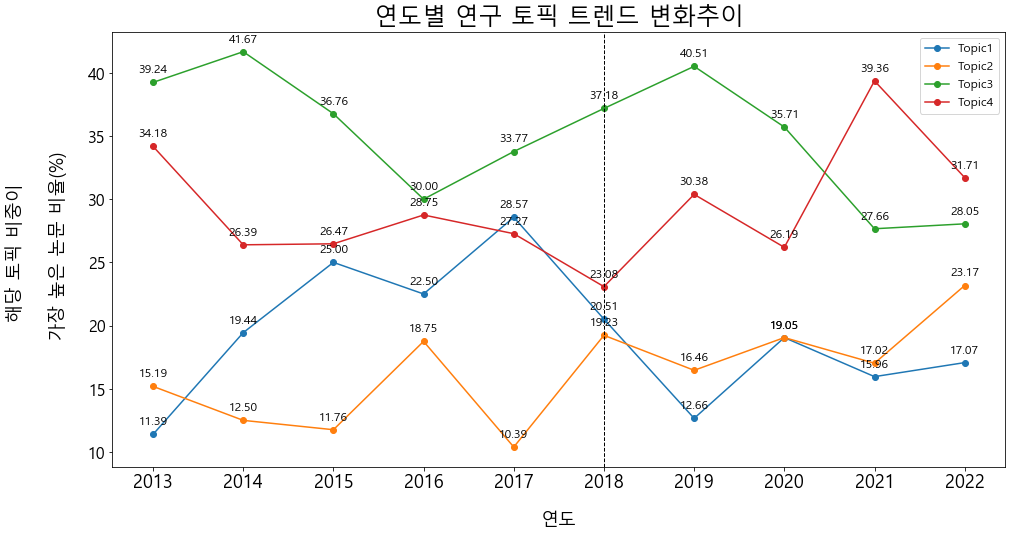

In [98]:
import matplotlib.pyplot as plt

x=range(2013,2023)
 
fig = plt.figure(figsize=(16,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(x,p_topic_1_list,marker='o',label='Topic1') ## 선그래프 생성
for i in range(len(x)):
    height = p_topic_1_list[i]
    plt.text(x[i], height + 0.5, '%.2f' %height, ha='center', va='bottom', size = 12)
ax.plot(x,p_topic_2_list,marker='o',label='Topic2') 
for i in range(len(x)):
    height = p_topic_2_list[i]
    plt.text(x[i], height + 0.5, '%.2f' %height, ha='center', va='bottom', size = 12)
ax.plot(x,p_topic_3_list,marker='o',label='Topic3')
for i in range(len(x)):
    height = p_topic_3_list[i]
    plt.text(x[i], height + 0.5, '%.2f' %height, ha='center', va='bottom', size = 12)
ax.plot(x,p_topic_4_list,marker='o',label='Topic4')
for i in range(len(x)):
    height = p_topic_4_list[i]
    plt.text(x[i], height + 0.5, '%.2f' %height, ha='center', va='bottom', size = 12)

ax.legend() ## 범례

plt.xlabel("연도", size=18, labelpad=20)
plt.ylabel("해당 토픽 비중이 \n\n 가장 높은 논문 비율(%)", size=18, labelpad=20)
plt.xticks([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], size=18)
plt.yticks([10, 15, 20, 25, 30, 35, 40], size=16)

plt.axvline(x=2018, color='k', linestyle='--', linewidth=1)
plt.title("연도별 연구 토픽 트렌드 변화추이", size=24) ## 타이틀 설정
plt.show()

# ITS 주제 논문 빈도 수 상위 10개 학술지 별 토픽 비중

In [55]:
article

['International Journal of Artificial Intelligence in Education',
 'Computers and Education',
 'IEEE Transactions on Learning Technologies',
 'International Journal of Emerging Technologies in Learning',
 'Computers in Human Behavior',
 'Journal of Educational Psychology',
 'Educational Technology and Society',
 'Education and Information Technologies',
 'Educational Technology Research and Development',
 'Expert Systems with Applications']

In [56]:
null_list = []
for i in article:
    article_data = scopus_data[scopus_data['Source title']==i]
    topictable2 = topictable.loc[list(article_data.index)]
    p1 = round(len(topictable2[topictable2['가장 비중이 높은 토픽']==0])/len(article_data)*100, 2)
    p2 = round(len(topictable2[topictable2['가장 비중이 높은 토픽']==1])/len(article_data)*100, 2)
    p3 = round(len(topictable2[topictable2['가장 비중이 높은 토픽']==2])/len(article_data)*100, 2)
    p4 = round(len(topictable2[topictable2['가장 비중이 높은 토픽']==3])/len(article_data)*100, 2)
    print(i)
    print([p1, p2, p3, p4])
    print("")
    null_list.append([p1, p2, p3, p4])

null_list

International Journal of Artificial Intelligence in Education
[28.57, 9.52, 40.48, 21.43]

Computers and Education
[21.43, 7.14, 46.43, 25.0]

IEEE Transactions on Learning Technologies
[16.67, 29.17, 45.83, 8.33]

International Journal of Emerging Technologies in Learning
[9.52, 14.29, 42.86, 33.33]

Computers in Human Behavior
[15.79, 10.53, 36.84, 36.84]

Journal of Educational Psychology
[17.65, 5.88, 70.59, 5.88]

Educational Technology and Society
[7.14, 7.14, 28.57, 57.14]

Education and Information Technologies
[7.14, 14.29, 21.43, 57.14]

Educational Technology Research and Development
[16.67, 0.0, 50.0, 33.33]

Expert Systems with Applications
[0.0, 45.45, 9.09, 45.45]



[[28.57, 9.52, 40.48, 21.43],
 [21.43, 7.14, 46.43, 25.0],
 [16.67, 29.17, 45.83, 8.33],
 [9.52, 14.29, 42.86, 33.33],
 [15.79, 10.53, 36.84, 36.84],
 [17.65, 5.88, 70.59, 5.88],
 [7.14, 7.14, 28.57, 57.14],
 [7.14, 14.29, 21.43, 57.14],
 [16.67, 0.0, 50.0, 33.33],
 [0.0, 45.45, 9.09, 45.45]]

In [57]:
article_df = pd.DataFrame(columns=['Topic1', 'Topic2', 'Topic3', 'Topic4'])
for i in range(0, 10):
    article_df.loc[i] = null_list[i]
article_df['Journal Name'] = article
article_df = article_df[['Journal Name', 'Topic1', 'Topic2', 'Topic3', 'Topic4']]
article_df

,Journal Name,Topic1,Topic2,Topic3,Topic4
0,International Journal of Artificial Intelligen...,28.57,9.52,40.48,21.43
1,Computers and Education,21.43,7.14,46.43,25.00
2,IEEE Transactions on Learning Technologies,16.67,29.17,45.83,8.33
3,International Journal of Emerging Technologies...,9.52,14.29,42.86,33.33
4,Computers in Human Behavior,15.79,10.53,36.84,36.84
5,Journal of Educational Psychology,17.65,5.88,70.59,5.88
6,Educational Technology and Society,7.14,7.14,28.57,57.14
7,Education and Information Technologies,7.14,14.29,21.43,57.14
8,Educational Technology Research and Development,16.67,0.00,50.00,33.33
9,Expert Systems with Applications,0.00,45.45,9.09,45.45


In [58]:
article_list = list(article_df['Journal Name'])
article_list[0] = 'International Journal \n of \n Artificial Intelligence \n in Education'
article_list[1] = 'Computers \n and \n Education'
article_list[2] = 'IEEE Transactions \n on \n Learning Technologies'
article_list[3] = 'International Journal \n of \n Emerging Technologies \n in Learning'
article_list[4] = 'Computers \n in \n Human Behavior'
article_list[5] = 'Journal \n of \n Educational Psychology'
article_list[6] = 'Educational Technology \n and \n Society'
article_list[7] = 'Education \n and \n Information Technologies'
article_list[8] = 'Educational Technology Research \n and \n Development'
article_list[9] = 'Expert Systems \n with \n Applications'

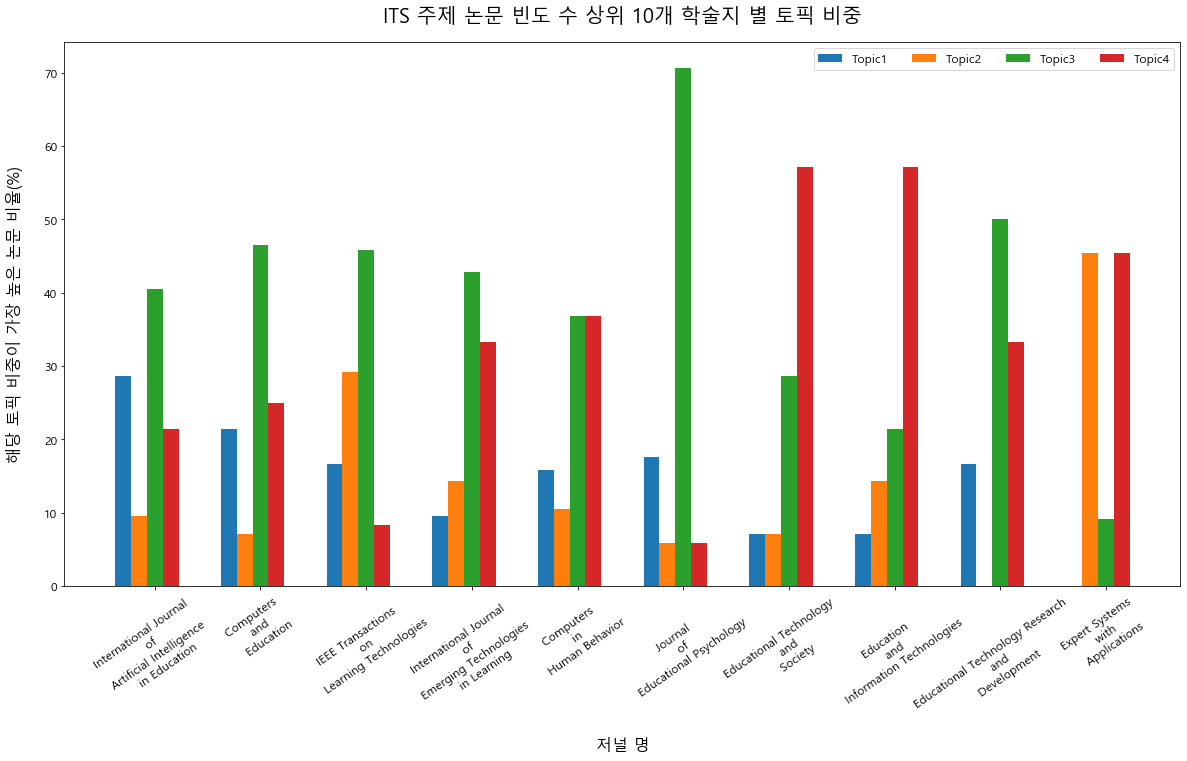

In [59]:
w = 0.15
nrow = article_df.shape[0] # 행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize = (20, 10))
plt.title('ITS 주제 논문 빈도 수 상위 10개 학술지 별 토픽 비중', size=20, pad=20)
plt.xlabel('저널 명', size=16)
plt.ylabel('해당 토픽 비중이 가장 높은 논문 비율(%)', size=16, labelpad=20)
plt.bar(idx - 2 * w, article_df['Topic1'], width = w, label = 'Topic1')
plt.bar(idx - w, article_df['Topic2'], width = w, label = 'Topic2')
plt.bar(idx, article_df['Topic3'], width = w, label = 'Topic3')
plt.bar(idx + w, article_df['Topic4'], width = w, label = 'Topic4')
plt.xticks(idx, labels=article_list, rotation=35)
plt.legend(ncol = 5)
plt.show()